In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from lucas_kanade import lucas_kanade

In [58]:
im1_path = "images/Car1.jpg"
im2_path = "images/Car2.jpg"

im1 = cv2.imread(im1_path, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_path, cv2.IMREAD_GRAYSCALE)

In [59]:
im1.shape, im2.shape

((272, 640), (272, 640))

### Computing flow using our code

### Computing flow using `cv2`

In [60]:
h, w = im1.shape
tile_size = 15

In [102]:
X = np.arange(np.floor(tile_size / 2), np.floor(w / tile_size) * tile_size, tile_size)
Y = np.arange(np.floor(tile_size / 2), np.floor(h / tile_size) * tile_size, tile_size)
P = np.array([[a, b] for a in Y for b in X]).astype(np.float32)

In [103]:
P.shape

(756, 2)

In [104]:
# calculate optical flow
V, st, err = cv2.calcOpticalFlowPyrLK(im1, im2, P, None, winSize=(15,15), maxLevel=1)

In [106]:
V = V.reshape((len(Y), len(X), 2)) / (h, w)

In [107]:
V = V.reshape((len(Y) * len(X), 2))

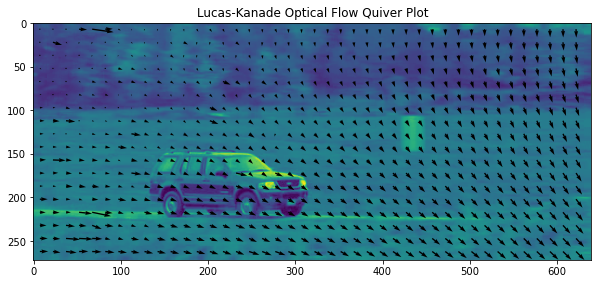

In [109]:
fig = plt.figure(figsize=(10, 5))
plt.title("Lucas-Kanade Optical Flow Quiver Plot")
plt.imshow(im1)
plt.quiver(P[:, 1].astype(int), P[:, 0].astype(int), V[:, 0], V[:, 1], angles='xy', scale_units="xy", scale=0.1)
plt.show()